## **APPLICATION WORKSHOP 1: Scouting Case**

* ***Geoffrey Pasaje - A03380495***
* ***Mateo Rubio -***

You are part of the data analytics team at Sunderland AFC, a club in the English second division. Your team has been assigned to work on a project related to **recruiting players (scouting)**.

For this, you have access to a **FIFA video game database** that contains real information on **22,080 players worldwide**, collected in **February 2023**. This data is reliable, as the company has more than **6,000 scouts** across the world who continuously evaluate players' performance.

Your supervisor has asked you to provide a **description of the database** to better understand how it can be used. The dataset includes a **sheet with the variable dictionary**. Be sure to consult this information to understand the data properly.


* Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway


* Import dataset throughout google colab

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# dataset = pd.read_csv('/content/drive/MyDrive/APO 3/Semana 2/base_taller.csv', sep=';', na_values=[' ', ''])              # Como el archivo contiene algunos caracteres vacíos, con este comando pandas los interpreta como na (valores faltantes).


* Import dataset throughout local files

In [4]:
dataset = pd.read_csv('base_taller.csv', sep=';', na_values=[' ', ''])              # Como el archivo contiene algunos caracteres vacíos, con este comando pandas los interpreta como na (valores faltantes).

* ***What does this file contain? What does it look like?***

this dataset contains information about 22.080 football player from whole world

In [5]:
dataset

,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,pref_foot,weak_foot,skill_moves,international_reputation,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall
0,231747,Kylian Mbappé Lottin,23,France,182,161,ST,91,95,"190,5",Right,4,5,4,High,Low,Unique,France,Paris Saint Germain,84
1,192985,Kevin De Bruyne,31,Belgium,181,165,CM,91,91,"107,5",Right,5,4,4,High,Medium,Unique,England,Manchester City,85
2,188545,Robert Lewandowski,33,Poland,185,179,ST,91,91,84,Right,4,4,5,High,Medium,Unique,Spain,Fc Barcelona,83
3,165153,Karim Benzema,34,France,185,179,CF,91,91,64,Right,4,4,4,Medium,Medium,Normal (170-185),Spain,Real Madrid,85
4,158023,Lionel Andrés Messi Cuccittini,35,Argentina,169,148,RW,91,91,54,Left,4,4,5,Low,Low,Unique,France,Paris Saint Germain,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22075,261876,Conan Noonan,19,Republic of Ireland,180,148,ST,52,63,"0,17",Right,3,2,1,Medium,Medium,Lean (170-185),Republic of Ireland,Shamrock Rovers,63
22076,254232,Mohammed Asif Khan,21,India,171,121,CAM,46,58,"0,12",Right,2,2,1,Low,Medium,Lean (170-185),India,Mumbai City,62
22077,259213,Antonio D'Silva,22,India,182,161,GK,51,61,"0,11",Right,3,1,1,Medium,Medium,Normal (170-185),India,Odisha Fc,58
22078,258802,Bhupender Singh,22,India,172,157,RM,46,54,"0,11",Right,2,2,1,Medium,Medium,Lean (170-185),India,Jamshedpur,58


* statistics measures from numeric columns

In [6]:
dataset.describe()

,player_id,age,height_cm,weight_lbs,overall,potential,weak_foot,skill_moves,international_reputation,club_overall
count,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000
mean,238806.667618,24.894112,181.391893,165.399457,65.223958,70.458107,2.932699,2.362726,1.075272,68.295743
std,28565.188684,4.891117,6.852274,15.411979,6.804443,6.147813,0.673396,0.764252,0.334532,5.358555
min,1179.000000,16.000000,155.000000,108.000000,46.000000,46.000000,1.000000,1.000000,1.000000,0.000000
25%,222433.250000,21.000000,176.000000,154.000000,61.000000,66.000000,3.000000,2.000000,1.000000,65.000000
50%,243590.000000,24.000000,181.000000,165.000000,65.000000,70.000000,3.000000,2.000000,1.000000,68.000000
75%,262079.500000,28.000000,186.000000,176.000000,70.000000,74.000000,3.000000,3.000000,1.000000,71.000000
max,275460.000000,44.000000,206.000000,231.000000,91.000000,95.000000,5.000000,5.000000,5.000000,85.000000


* First 5 rows

In [7]:
dataset.head()

,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,pref_foot,weak_foot,skill_moves,international_reputation,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall
0,231747,Kylian Mbappé Lottin,23,France,182,161,ST,91,95,"190,5",Right,4,5,4,High,Low,Unique,France,Paris Saint Germain,84
1,192985,Kevin De Bruyne,31,Belgium,181,165,CM,91,91,"107,5",Right,5,4,4,High,Medium,Unique,England,Manchester City,85
2,188545,Robert Lewandowski,33,Poland,185,179,ST,91,91,84,Right,4,4,5,High,Medium,Unique,Spain,Fc Barcelona,83
3,165153,Karim Benzema,34,France,185,179,CF,91,91,64,Right,4,4,4,Medium,Medium,Normal (170-185),Spain,Real Madrid,85
4,158023,Lionel Andrés Messi Cuccittini,35,Argentina,169,148,RW,91,91,54,Left,4,4,5,Low,Low,Unique,France,Paris Saint Germain,84


* Last 5 rows

In [8]:
dataset.tail()

,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,pref_foot,weak_foot,skill_moves,international_reputation,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall
22075,261876,Conan Noonan,19,Republic of Ireland,180,148,ST,52,63,"0,17",Right,3,2,1,Medium,Medium,Lean (170-185),Republic of Ireland,Shamrock Rovers,63
22076,254232,Mohammed Asif Khan,21,India,171,121,CAM,46,58,"0,12",Right,2,2,1,Low,Medium,Lean (170-185),India,Mumbai City,62
22077,259213,Antonio D'Silva,22,India,182,161,GK,51,61,"0,11",Right,3,1,1,Medium,Medium,Normal (170-185),India,Odisha Fc,58
22078,258802,Bhupender Singh,22,India,172,157,RM,46,54,"0,11",Right,2,2,1,Medium,Medium,Lean (170-185),India,Jamshedpur,58
22079,271608,Aqeel Al Dhafeeri,17,Saudi Arabia,180,154,CB,46,63,"0,11",Right,3,2,1,Medium,Medium,Lean (170-185),Saudi Arabia,Al Batin,59


* ***How many rows & columns does it have?***

In [9]:
dataset.shape

(22080, 20)

constaints 22080 rows y 20 columns

* ***What do the column headings mean?***

It's information about football player such as their age, market value, origin team, strong leg, etc.

In [10]:
dataset.columns

Index(['player_id', 'player_name', 'age', 'country', 'height_cm', 'weight_lbs',
       'position', 'overall', 'potential', 'Value_millions', 'pref_foot',
       'weak_foot', 'skill_moves', 'international_reputation',
       'Attacking_work_rate', 'Defensive_work_rate', 'body_type',
       'club_country', 'club_name', 'club_overall'],
      dtype='object')

## **1. What type of variable is each column?**

(Recall to classify them according to the 4 types discussed in class.)


Let's classify each variable based on **the 4 data types**:

* **Nominal** (categorical, no order)
* **Ordinal** (categorical, with order)
* **Discrete** (numeric, countable integers)
* **Continuous** (numeric, real values)

| Column                     | Type       | Reasoning                                                              |
| -------------------------- | ---------- | ---------------------------------------------------------------------- |
| `player_id`                | Discrete   | Unique integer identifier. Not meaningful for analysis, but countable. |
| `player_name`              | Nominal    | Textual name, no order.                                                |
| `age`                      | Discrete   | Integer number of years.                                               |
| `country`                  | Nominal    | Name of the player's country.                                          |
| `height_cm`                | Continuous | Measurement in cm. Can be decimal even if it's stored as int.          |
| `weight_lbs`               | Continuous | Measurement in lbs, real value.                                        |
| `position`                 | Nominal    | Player's position (e.g. GK, ST), unordered categories.                 |
| `overall`                  | Discrete   | Rating from 1–100, integers.                                           |
| `potential`                | Discrete   | Also 1–100 integers.                                                   |
| `Value_millions`           | Continuous | Monetary value (stored as string like `"0,17"` but should be float).   |
| `pref_foot`                | Nominal    | "Right" or "Left". Categorical without order.                          |
| `weak_foot`                | Ordinal    | Stars (1 to 5), with natural ordering.                                 |
| `skill_moves`              | Ordinal    | Stars (1 to 5), ordered scale.                                         |
| `international_reputation` | Ordinal    | 1 to 5, higher = better reputation.                                    |
| `Attacking_work_rate`      | Nominal    | Text (Low, Medium, High), usually treated as unordered.                |
| `Defensive_work_rate`      | Nominal    | Same as above.                                                         |
| `body_type`                | Nominal    | Categories like "Lean", "Normal".                                      |
| `club_country`             | Nominal    | Country of the club.                                                   |
| `club_name`                | Nominal    | Name of the club.                                                      |
| `club_overall`             | Discrete   | Club rating (e.g. 63), integer value.                                  |



In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22080 entries, 0 to 22079
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   player_id                 22080 non-null  int64 
 1   player_name               22080 non-null  object
 2   age                       22080 non-null  int64 
 3   country                   22080 non-null  object
 4   height_cm                 22080 non-null  int64 
 5   weight_lbs                22080 non-null  int64 
 6   position                  22080 non-null  object
 7   overall                   22080 non-null  int64 
 8   potential                 22080 non-null  int64 
 9   Value_millions            22080 non-null  object
 10  pref_foot                 22080 non-null  object
 11  weak_foot                 22080 non-null  int64 
 12  skill_moves               22080 non-null  int64 
 13  international_reputation  22080 non-null  int64 
 14  Attacking_work_rate   

## **2. Perform a complete descriptive analysis of the following columns:**

a) `Age`
b) `height_cm`
c) `position`
d) `club_country`
e) `overall`
f) `club_overall`
g) `value_millions`
h) `pref_foot`

### a) `age`

* **Type**: Discrete
* Analyze:

<Axes: xlabel='age', ylabel='Count'>

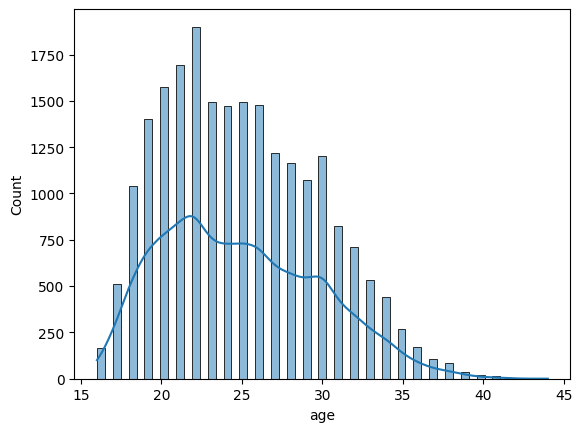

In [12]:
dataset['age'].describe()
sns.histplot(dataset['age'], kde=True)

* Gives distribution of players by age (min, max, avg, etc.).
----------

### b) `height_cm`

* **Type**: Continuous
* Analyze:


<Axes: xlabel='height_cm', ylabel='Count'>

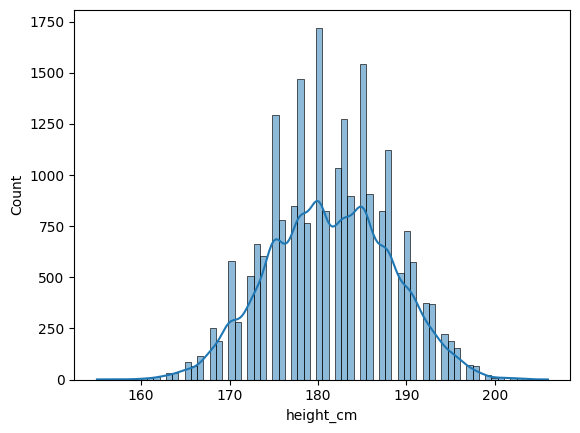

In [13]:
dataset['height_cm'].describe()
sns.histplot(dataset['height_cm'], kde=True)

------


### c) `position`

* **Type**: Nominal
* Analyze:

<Axes: xlabel='count', ylabel='position'>

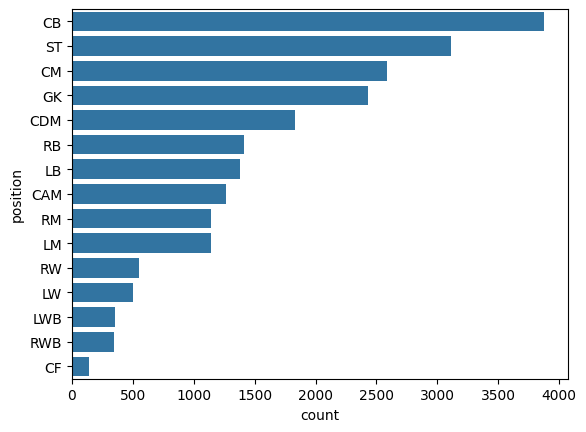

In [14]:
dataset['position'].value_counts()
sns.countplot(y='position', data=dataset, order=dataset['position'].value_counts().index)

### e) `overall`

* **Type**: Discrete
* Analyze:


<Axes: xlabel='overall', ylabel='Count'>

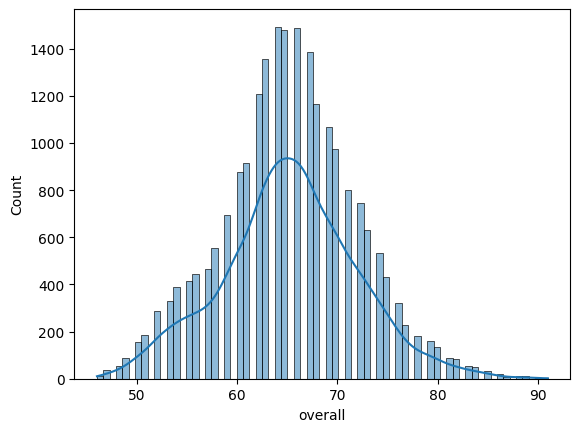

In [15]:
dataset['overall'].describe()
sns.histplot(dataset['overall'], kde=True)

### f) `club_overall`

* **Type**: Discrete
* Analyze:

<Axes: xlabel='club_overall', ylabel='Count'>

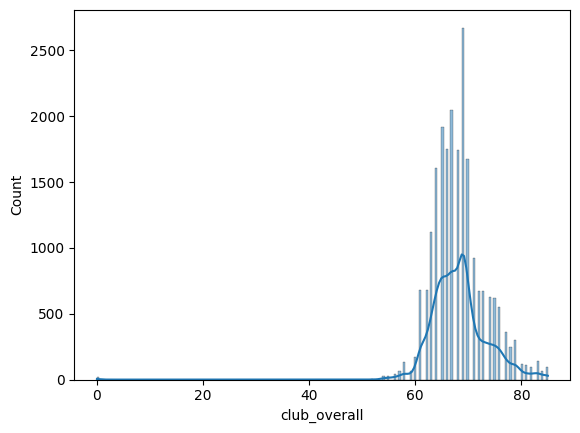

In [16]:
dataset['club_overall'].describe()
sns.histplot(dataset['club_overall'], kde=True)

### g) `value_millions`

* **Type**: Continuous (but needs cleaning!)
* Clean and analyze:

<Axes: xlabel='Value_millions', ylabel='Count'>

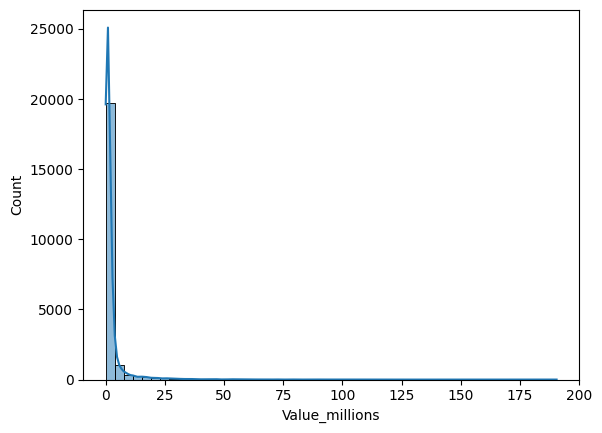

In [17]:
dataset['Value_millions'] = dataset['Value_millions'].str.replace(',', '.').astype(float)
dataset['Value_millions'].describe()
sns.histplot(dataset['Value_millions'], bins=50, kde=True)

## **3. A member of the coaching staff claims that tall goalkeepers (GK) perform better overall. What can you conclude from a descriptive analysis?**

**(Note: use three height groups as a definition:**

**i) less than 185 cm.**

**ii) between 185 and 192 cm.**

**iii) more than 192 cm.**

* First, we filter the dataset with only goalkeepers

In [18]:
goalkeepers = dataset[(dataset['position'] == 'GK')]

In [19]:
goalkeepers

,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,pref_foot,weak_foot,skill_moves,international_reputation,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall
6,192119,Thibaut Nicolas Marc Courtois,30,Belgium,199,212,GK,90,91,90.00,Left,3,1,4,Medium,Medium,Unique,Spain,Real Madrid,85
7,212831,Alisson Ramsés Becker,29,Brazil,193,201,GK,89,90,79.00,Right,3,1,3,Medium,Medium,Unique,England,Liverpool,84
11,200389,Jan Oblak,29,Slovenia,188,192,GK,89,90,79.00,Right,3,1,5,Medium,Medium,Unique,Spain,Atlético Madrid,83
14,167495,Manuel Peter Neuer,36,Germany,193,205,GK,89,89,11.50,Right,4,1,5,Medium,Medium,Unique,Germany,Fc Bayern München,85
16,230621,Gianluigi Donnarumma,23,Italy,196,198,GK,88,92,103.50,Right,3,1,3,Medium,Medium,Unique,France,Paris Saint Germain,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22057,256413,Jack Lemoignan,21,Northern Ireland,186,168,GK,49,60,0.09,Right,3,1,1,Medium,Medium,Lean (185+),Northern Ireland,Derry City,61
22059,271554,Toms Leitis,18,Latvia,185,165,GK,50,65,0.09,Right,3,1,1,Medium,Medium,Normal (185+),Republic of Ireland,Shamrock Rovers,63
22064,261423,Nikhil Deka,19,India,185,150,GK,48,61,0.10,Right,3,1,1,Medium,Medium,Lean (185+),India,Northeast United,58
22065,271179,Andreș Brînzea,16,Romania,187,168,GK,50,69,0.10,Right,2,1,1,Medium,Medium,Lean (185+),Romania,Chindia Târgovişte,64


* Then we create three categories to difference goalkeepers because: 

    * **Comparability**	It lets you group goalkeepers into meaningful physical categories.
    * **Variance Analysis**	ANOVA needs distinct groups. We can't run ANOVA on continuous height directly.
    * **Interpretability**	we can explain: "Taller goalkeepers (above 192 cm) vs Medium (185–192 cm) vs Short (below 185 cm)."
    * **Real-world application** Scouts and coaches think in categories: short, average, tall. This mirrors reality

In [20]:
goalkeepers['height_category'] = pd.cut(goalkeepers['height_cm'],
                                bins=[0, 185, 192, goalkeepers['height_cm'].max()],
                                labels=['Bajo', 'Medio', 'Alto'])

/tmp/ipykernel_4284/2172611208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goalkeepers['height_category'] = pd.cut(goalkeepers['height_cm'],


In [21]:
goalkeepers_filter = goalkeepers[['height_category', 'player_name', 'position', 'club_overall', 'height_cm']]

In [22]:
goalkeepers_filter

,height_category,player_name,position,club_overall,height_cm
6,Alto,Thibaut Nicolas Marc Courtois,GK,85,199
7,Alto,Alisson Ramsés Becker,GK,84,193
11,Medio,Jan Oblak,GK,83,188
14,Alto,Manuel Peter Neuer,GK,85,193
16,Alto,Gianluigi Donnarumma,GK,84,196
...,...,...,...,...,...
22057,Medio,Jack Lemoignan,GK,61,186
22059,Bajo,Toms Leitis,GK,63,185
22064,Bajo,Nikhil Deka,GK,58,185
22065,Medio,Andreș Brînzea,GK,64,187


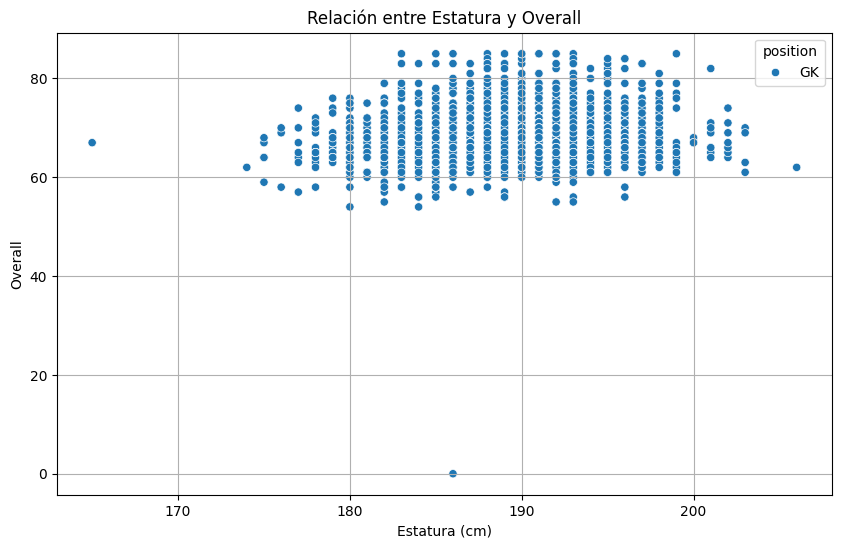

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=goalkeepers_filter, x='height_cm', y='club_overall', hue='position') 
plt.title('Relación entre Estatura y Overall')
plt.xlabel('Estatura (cm)')
plt.ylabel('Overall')
plt.grid(True)
plt.show()

* ***Check group statistics***

In [24]:
goalkeepers.groupby('height_category')['club_overall'].describe()

/tmp/ipykernel_4284/2764186075.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goalkeepers.groupby('height_category')['club_overall'].describe()


,count,mean,std,min,25%,50%,75%,max
height_category,,,,,,,,
Bajo,649.0,67.029276,4.519922,54.0,64.0,67.0,69.0,85.0
Medio,1264.0,68.958861,5.381993,0.0,65.0,69.0,72.0,85.0
Alto,517.0,69.363636,5.395885,55.0,65.0,69.0,73.0,85.0


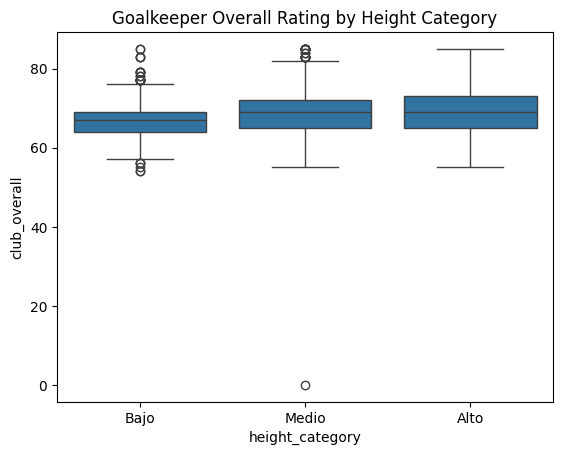

In [25]:
sns.boxplot(data=goalkeepers_filter, x='height_category', y='club_overall')
plt.title('Goalkeeper Overall Rating by Height Category')
plt.show()

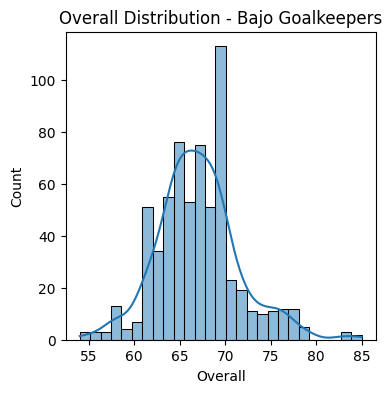

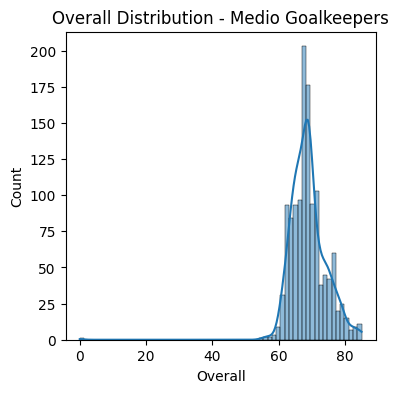

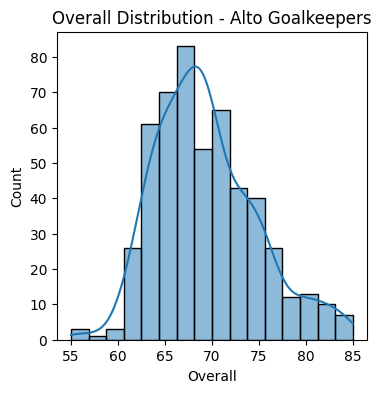

In [26]:
for category in ['Bajo', 'Medio', 'Alto']:
    plt.figure(figsize=(4, 4))
    sns.histplot(goalkeepers_filter[goalkeepers_filter['height_category'] == category]['club_overall'], kde=True)
    plt.title(f'Overall Distribution - {category} Goalkeepers')
    plt.xlabel('Overall')
    plt.show()

The distributions are close to normal (especially for "Alto" and "Medio"), so ANOVA is appropriate.

* **We are going to use a ANOVA (Analysis of Variance) because:**

    It allows us to statistically compare the means of three or more independent groups (in our case: Short, Medium, Tall goalkeepers) to determine if at least one group has a significantly different mean overall rating.

In [33]:
short = goalkeepers_filter[goalkeepers_filter['height_category'] == 'Bajo']['club_overall']
medium = goalkeepers_filter[goalkeepers_filter['height_category'] == 'Medio']['club_overall']
tall = goalkeepers_filter[goalkeepers_filter['height_category'] == 'Alto']['club_overall']

f_stat, p_value = f_oneway(short, medium, tall)
print("F-statistic:", f_stat)
print("p-value:", p_value)
if p_value < 0.05:
    print("At least one group has a significantly different overall.")
else:
    print(" No evidence of a significant difference.")

F-statistic: 38.42695710554377
p-value: 3.7167923081114694e-17
At least one group has a significantly different overall.


We performed an ANOVA test to determine whether the mean overall rating differs among goalkeeper height categories (Short, Medium, Tall).
The result (F=38.42695710554377, p < 3.7167923081114694e-17) showed a statistically significant difference

## 4. **An analyst claims that **left-footed players** have **better performance (overall)** than right-footed ones. What can you say about this statement based on descriptive analysis**?

